In [3]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = (20, 13)
plt.style.use('ggplot')
from nilmtk import DataSet
from nilmtk.utils import print_dict



blond = DataSet('/home/eb3rh4rd/Documents/energy/BLOND-CONVERTER/data_converter/converted_sum.hdf5')
print_dict(blond.metadata)


In [5]:
elec = blond.buildings[1].elec
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='BLOND', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='BLOND', site_meter, appliances=[])
  ElecMeter(instance=3, building=1, dataset='BLOND', site_meter, appliances=[])
  ElecMeter(instance=4, building=1, dataset='BLOND', appliances=[Appliance(type='ICT appliance', instance=1), Appliance(type='paper shredder', instance=1), Appliance(type='multi-function device', instance=1), Appliance(type='electric air heater', instance=1)])
  ElecMeter(instance=5, building=1, dataset='BLOND', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=6, building=1, dataset='BLOND', appliances=[Appliance(type='charger', instance=1)])
  ElecMeter(instance=7, building=1, dataset='BLOND', appliances=[Appliance(type='computer monitor', instance=1)])
  ElecMeter(instance=8, building=1, dataset='BLOND', appliances=[Appliance(type='computer monitor', instance=2)])
  ElecMeter(instance=9, building=1, dataset='B

In [3]:
elec.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='BLOND', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='BLOND', site_meter, appliances=[])
  ElecMeter(instance=3, building=1, dataset='BLOND', site_meter, appliances=[])
)

In [4]:
elec.mains().power_series_all_data().head()

Loading data for meter ElecMeterID(instance=3, building=1, dataset='BLOND')     
Done loading data all meters for this chunk.


2017-05-12 11:08:46+02:00    1247.638428
2017-05-12 11:08:47+02:00    1261.200317
2017-05-12 11:08:48+02:00    1273.252930
2017-05-12 11:08:49+02:00    1259.650391
2017-05-12 11:08:50+02:00    1259.545532
Name: (power, active), dtype: float32

In [6]:
elec.submeters().meters[:5]

[ElecMeter(instance=4, building=1, dataset='BLOND', appliances=[Appliance(type='ICT appliance', instance=1), Appliance(type='paper shredder', instance=1), Appliance(type='multi-function device', instance=1), Appliance(type='electric air heater', instance=1)]),
 ElecMeter(instance=5, building=1, dataset='BLOND', appliances=[Appliance(type='fan', instance=1)]),
 ElecMeter(instance=6, building=1, dataset='BLOND', appliances=[Appliance(type='charger', instance=1)]),
 ElecMeter(instance=7, building=1, dataset='BLOND', appliances=[Appliance(type='computer monitor', instance=1)]),
 ElecMeter(instance=8, building=1, dataset='BLOND', appliances=[Appliance(type='computer monitor', instance=2)])]

In [6]:
mains = elec.mains()

In [7]:
mains.available_ac_types('power')

['active', 'apparent']

In [8]:
elec.submeters().available_ac_types('power')

['active', 'apparent']

In [10]:
elec.mains().total_energy() # kWh

Calculating total_energy for ElecMeterID(instance=2, building=1, dataset='BLOND') ...   ElecMeterID(instance=3, building=1, dataset='BLOND') ...   

active      607.239647
apparent    818.261523
dtype: float64

Loading data for meter ElecMeterID(instance=93, building=1, dataset='BLOND')     
Done loading data all meters for this chunk.


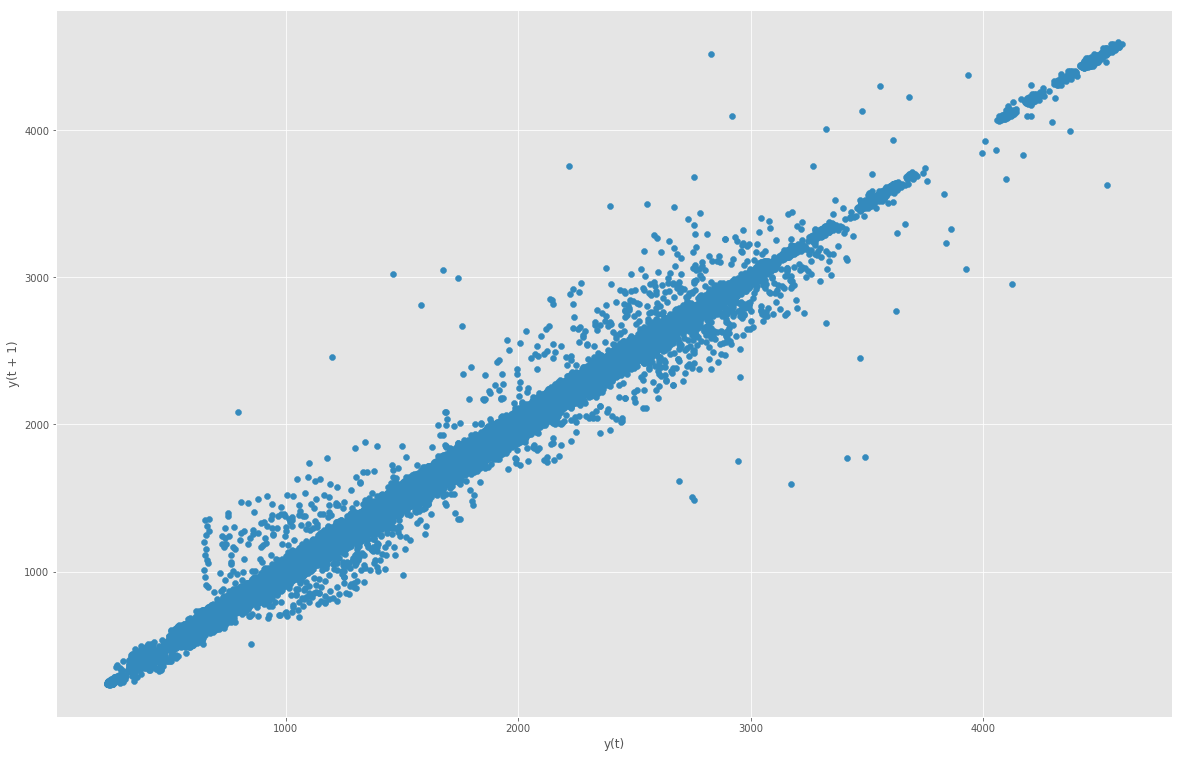

In [39]:
elec.plot_lag()

(<networkx.classes.digraph.DiGraph at 0x14d9fba8>,
 <matplotlib.axes._axes.Axes at 0x1b2a97f0>)

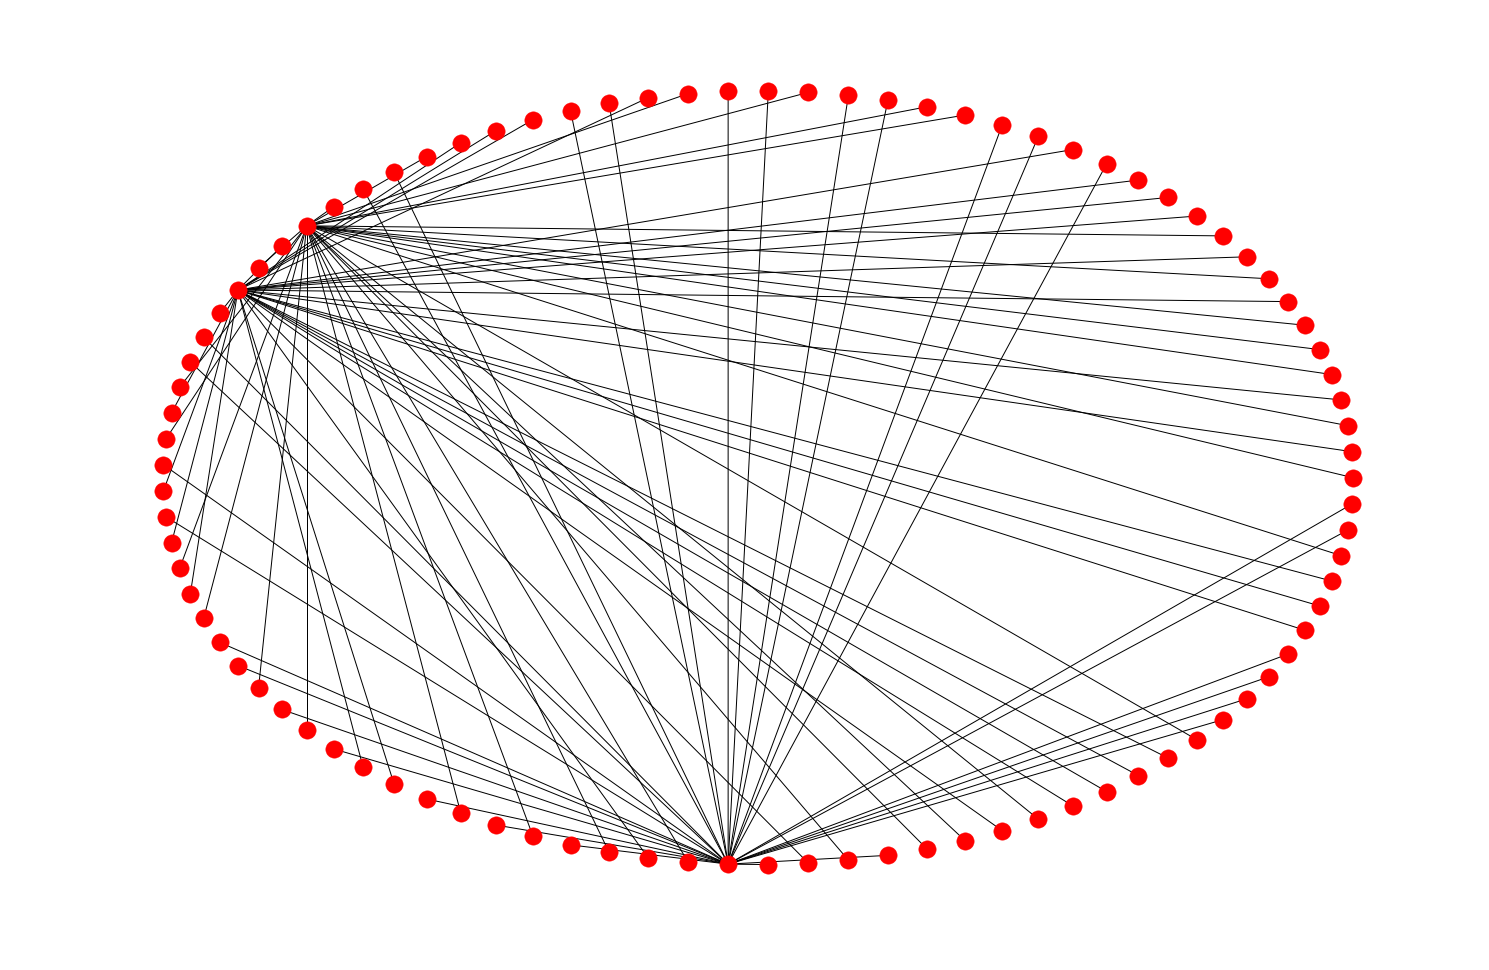

In [38]:
elec.draw_wiring_graph()

In [13]:
laptop_meter = elec['laptop computer']

In [14]:
laptop_meter.upstream_meter()

ElecMeter(instance=1, building=1, dataset='BLOND', site_meter, appliances=[])

In [15]:
laptop_meter.device

{'max_sample_period': 2,
 'measurements': [{'physical_quantity': 'current'},
  {'physical_quantity': 'power', 'type': 'active'},
  {'physical_quantity': 'power', 'type': 'apparent'},
  {'physical_quantity': 'voltage'}],
 'model': 'Medal',
 'sample_period': 1}

In [16]:
laptop_meter.dominant_appliance()

Appliance(type='laptop computer', instance=1)

In [17]:
laptop_meter.total_energy() # kWh

active    4.435122
dtype: float64

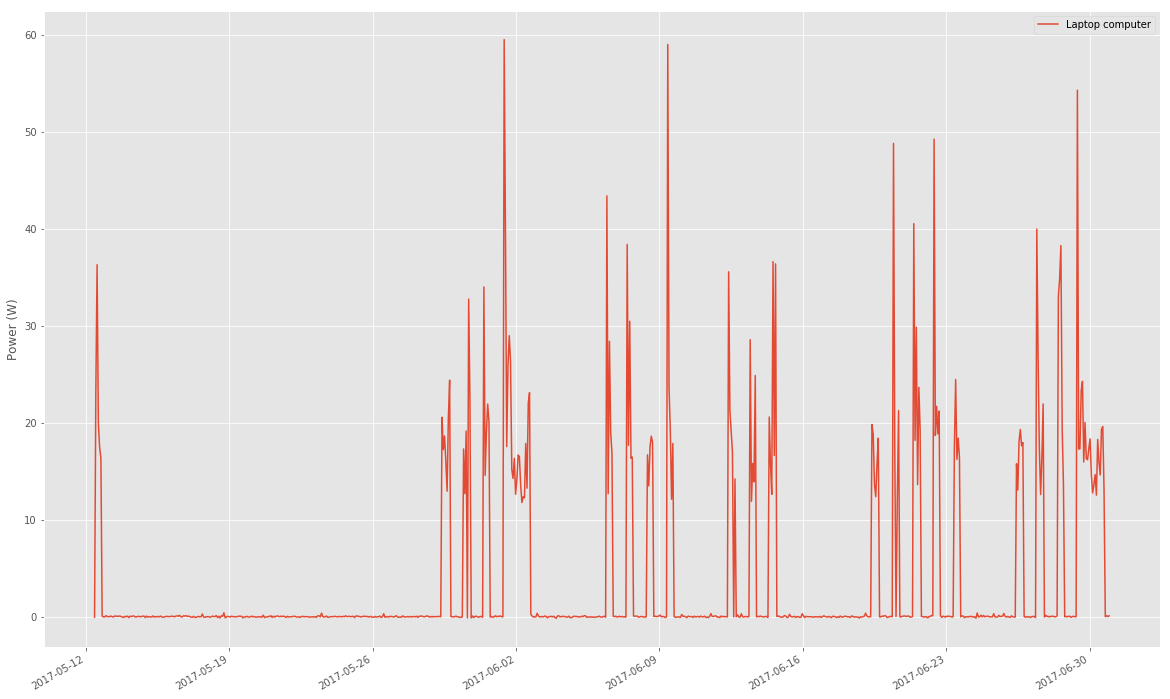

In [40]:
laptop_meter.plot()

In [19]:
monitor_meter = elec['computer monitor']

In [20]:
monitor_meter.upstream_meter()

ElecMeter(instance=1, building=1, dataset='BLOND', site_meter, appliances=[])

In [21]:
monitor_meter.uptime()

Timedelta('49 days 12:29:59')

In [23]:
monitor_meter.min_off_duration()

20

In [24]:
monitor_meter.min_on_duration()

20

In [25]:
monitor_meter.vampire_power()

0.44443974

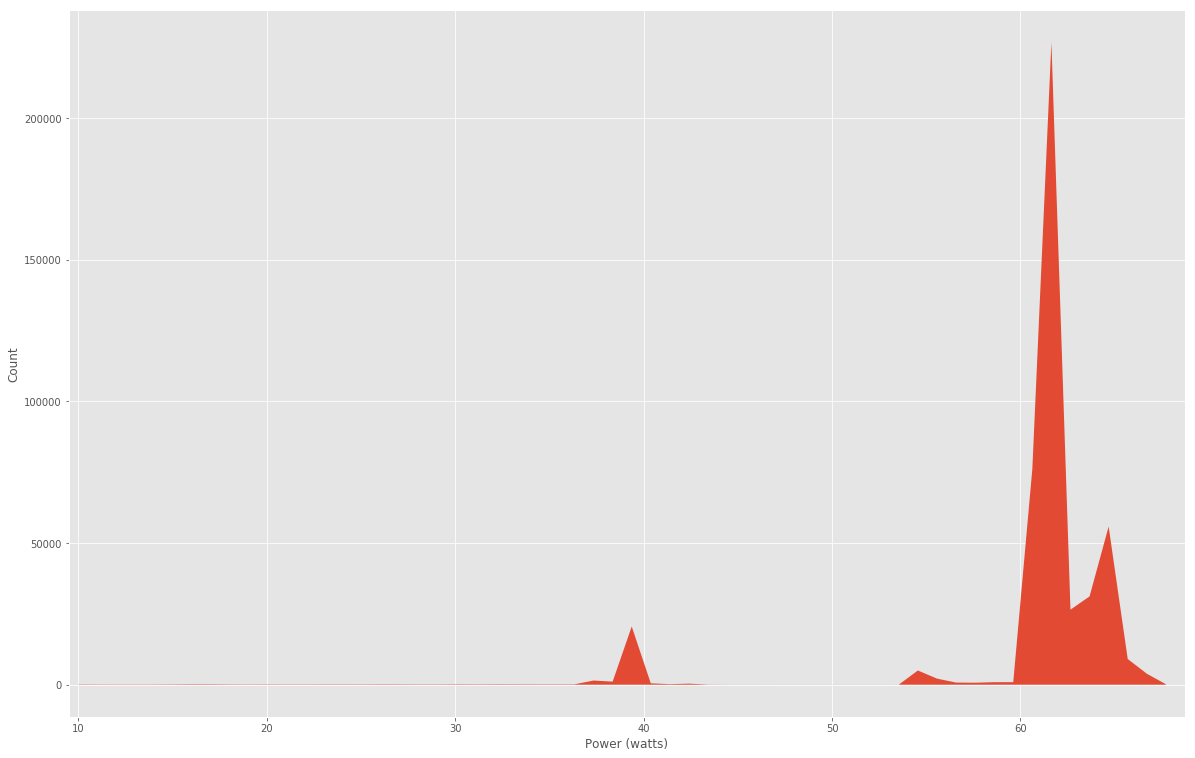

In [41]:
monitor_meter.plot_power_histogram()

In [27]:
monitor_meter.proportion_of_upstream()

0.028326891696165438